In [8]:
import numpy as np
from matplotlib import pyplot as plt

In [9]:
input = open('p12.txt', mode='r')
landscape = np.array([[]])
for line in input.readlines():
    
    values = list(
        map(
            ord,
            line.strip('\n')
            )
            )
    # print(np.array([values]))
    N= len(values)
    landscape = np.c_[landscape,np.array([values])]
np.where(landscape == ord('S'))[0]

landscape = landscape.reshape([-1,N])
start = np.where(landscape == ord('S'))[0][0],np.where(landscape == ord('S'))[1][0]
end = np.where(landscape == ord('E'))[0][0],np.where(landscape == ord('E'))[1][0]
landscape[start] = ord('a')
landscape[end] = ord('z')
landscape = landscape -90

end = np.array(end)


In [10]:
def check_presence(a, b):
    if b:
        items = np.where(np.logical_not(np.any(b - a,axis=1)))[0].tolist()
        
        if items:
            for id in items:
                if (landscape[a[0], a[1]] - landscape[b[id][0], b[id][1]]) <= 1: return True
    return False

In [4]:
def show_map(points):

    plt.figure(figsize=(24,6))
    plt.imshow(landscape)
    print(points)
    plt.plot(points[1], points[0], 'r*')

In [11]:
def form_alternatives(point, M):
    alternatives = np.array([point + [-1, 0], point + [1, 0], point + [0, 1], point + [0, -1] ])
    alternatives = np.unique(
            alternatives.clip([0,0],[landscape.shape[0]-1,landscape.shape[1]-1]),
            axis=0
            )
    return alternatives.T


In [18]:
distance_map = -np.ones(landscape.shape)
def form_map(points,distance,distance_map=distance_map):

    distance+=1
    for point in points:
        hight = landscape[point[0], point[1]]
        alternatives = form_alternatives(point,landscape)
        args = np.argwhere(distance_map[alternatives[0], alternatives[1]] < 0)
        alternatives = alternatives[0][args.T][0],alternatives[1][args.T][0]

        args = np.argwhere(landscape[alternatives[0], alternatives[1]] >= hight -1)
        alternatives = alternatives[0][args.T][0],alternatives[1][args.T][0]

        distance_map[alternatives[0], alternatives[1]] = distance
        next_points = np.array(np.where(distance_map==distance)).T
        
    return [next_points[i] for i in range(next_points.shape[0])], distance

points, distance = form_map([end],0)
# while not check_presence(np.array(start), points):
#     points, distance = form_map(points,distance)
#     i = np.array(points).T
#     if np.sort(landscape[i[0],i[1]])[0] == ord('a')-90:
#         break
    # print(np.sort(landscape[i[0],i[1]])[0])
print(distance)

1


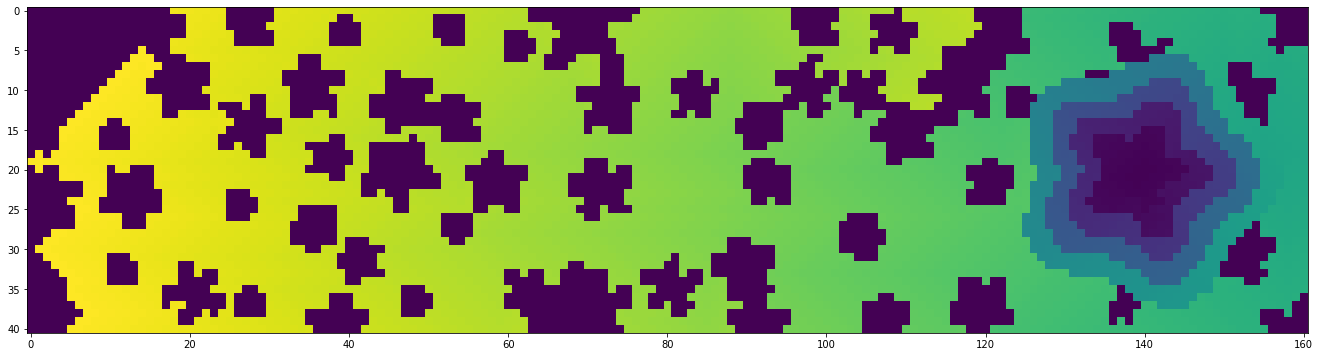

In [10]:
plt.figure(figsize=(24,6))
plt.imshow(distance_map)

In [8]:
# trajectory = [start]
# goal = np.array(end)
# max_depth = 461
# print(start)
# def take_step(trajectory, step=0):
#     # print(f'{trajectory =}')
#     # print(f'{step =}')
#     if step > max_depth: return True, trajectory
#     position = trajectory[-1]
#     # print(f'{position = }')
#     alternatives = np.array([position + [-1, 0], position + [1, 0], position + [0, 1], position + [0, -1] ])
#     # print(f'{alternatives = }')
#     # print(alternatives.clip([0,0],landscape.shape-1))
#     alternatives = np.unique(
#             alternatives.clip([0,0],[landscape.shape[0]-1,landscape.shape[1]-1]),
#             axis=0
#             )
#     # print(f'{alternatives = }')
#     moves = []
#     # print(position)
#     # print(landscape[position[0], position[1]])
#     for a in alternatives:
#         dz = (landscape[position[0], position[1]] - landscape[a[0], a[1]])
#         if dz <-1: continue
#         if np.all(a == goal): return True, trajectory
#         if check_presence(a, trajectory[:-2]): return False, []
#         if len(trajectory)>1 and np.all(a == trajectory[-2]): continue
#         if np.all(a == trajectory[-1]): continue
        
#         moves.append(a)
    
#     moves = sorted(moves, key= lambda x: 1*(-landscape[position[0], position[1]] + landscape[x[0], x[1]]) + .5*(x-position) @ (goal-position))
#     # if step>395:

#     #     print(f'{moves=}')
#     for move in reversed(moves):
#         # print('test ', trajectory+[move])
#         succcess, path = take_step(trajectory +[move], step=step+1)
#         if succcess: return True, path
    
#     return False, []

In [3]:
from IPython.display import HTML


In [12]:
def form_map(points,distance,distance_map):

    distance+=1
    for point in points:
        hight = landscape[point[0], point[1]]
        alternatives = form_alternatives(point,landscape)
        args = np.argwhere(distance_map[alternatives[0], alternatives[1]] < 0)
        alternatives = alternatives[0][args.T][0],alternatives[1][args.T][0]

        args = np.argwhere(landscape[alternatives[0], alternatives[1]] >= hight -1)
        alternatives = alternatives[0][args.T][0],alternatives[1][args.T][0]

        distance_map[alternatives[0], alternatives[1]] = distance
        next_points = np.array(np.where(distance_map==distance)).T
        
    return [next_points[i] for i in range(next_points.shape[0])], distance, distance_map.copy()



In [13]:
class map_iterator(object):
    def __init__(self, points, M,max_dist=100):
        self.M = M
        self.points, self.distance, self.M = form_map(points,0,M)
        self.max_dist = max_dist
    
    def __iter__(self):
        return self
    
    def __next__(self):
        return self.next()
    def next(self):
        if self.distance < self.max_dist:
            if not self.distance%10:
                print(self.distance, self.max_dist)
            self.points, self.distance, self.M = form_map(self.points, self.distance, self.M)
            
            return self.M
        raise StopIteration()

10 480
20 480
30 480
40 480
50 480
60 480
70 480
80 480
90 480
100 480
110 480
120 480
130 480
140 480
150 480
160 480
170 480
180 480
190 480
200 480
210 480
220 480
230 480
240 480
250 480
260 480
270 480
280 480
290 480
300 480
310 480
320 480
330 480
340 480
350 480
360 480
370 480
380 480
390 480
400 480
410 480
420 480
430 480
440 480
450 480
460 480
470 480


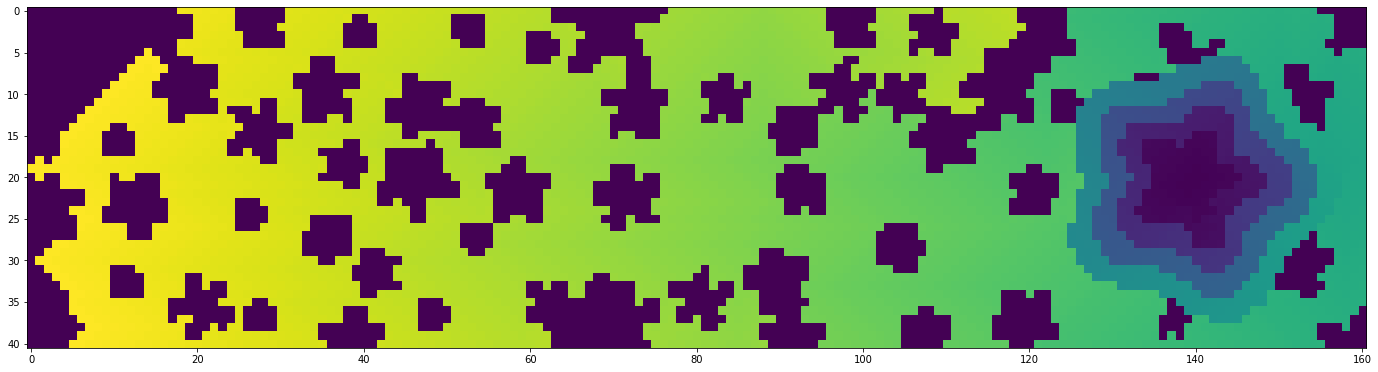

In [14]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

# fig, ax = plt.subplots()
distance_map = -np.ones(landscape.shape)
# points, distance = form_map([end],0)

fig = plt.figure( figsize=(24,10) )
im = plt.imshow(distance_map, animated=True)
# im = ax.imshow(distance_map)
M_iterator = map_iterator([end], distance_map, max_dist=480)
def init():
    # im.set_array(M_iterator)
    return im,

def update(x):
    im.set_array(x)
    plt.imshow(x)
    return im,

ani = FuncAnimation(fig, update, frames=M_iterator,
                    init_func=init,interval=100,cache_frame_data=False,save_count=480)
# plt.rcParams['animation.writer'] = 'avconv'
html  =ani.to_html5_video()
HTML(ani.to_html5_video())